In [2]:
%run main.ipynb

0    1775
1     104
Name: fraud, dtype: int64
0    0.944651
1    0.055349
Name: fraud, dtype: float64


In [3]:
# Table for training results
result_table = pd.DataFrame(columns=["Model", "Data Preparation", "Feature Count", "Features", 
                                     "Optimal Parameters", "Monetary Value Per Instance - Mean", 
                                     "Monetary Value Per Instance - Standard Deviation", 
                                     "Time needed", "Raw Model"])

# Model factory -> only KNeighborsClassifier for in-depth analysis

In [36]:
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.model_selection import KFold

skf = StratifiedKFold(n_splits=10)

model_tuning_factory = [
    GridSearchCV(KNeighborsClassifier(), 
                 dict(
                     n_neighbors = [1, 3, 5, 10, 15],
                     weights = ['uniform', 'distance'],
                     p = [1, 2, 3]
                 ),
                 cv = skf,
                 scoring = my_custom_score,
                 n_jobs=4)
]           
                 
                 
iterations = 10                 
               
model_tuning_factory_randomized = [
    RandomizedSearchCV(KNeighborsClassifier(), 
                 dict(
                     n_neighbors = [1, 3, 5, 10, 15],
                     weights = ['uniform', 'distance'],
                     p = [1, 2, 3]
                 ),
                 cv = skf,
                 scoring = my_custom_score,
                 n_iter = iterations, 
                 n_jobs=4)
]

In [37]:
run()

Finished KNeighborsClassifier with No Scaling and 1 features after 1.41 seconds
Finished KNeighborsClassifier with No Scaling and 2 features after 3.11 seconds
Finished KNeighborsClassifier with No Scaling and 3 features after 5.41 seconds
Finished KNeighborsClassifier with No Scaling and 4 features after 6.21 seconds
Finished KNeighborsClassifier with No Scaling and 5 features after 8.41 seconds
Finished KNeighborsClassifier with No Scaling and 6 features after 11.92 seconds
Finished KNeighborsClassifier with No Scaling and 7 features after 12.04 seconds
Finished KNeighborsClassifier with No Scaling and 8 features after 11.51 seconds
Finished KNeighborsClassifier with No Scaling and 9 features after 11.92 seconds
Finished KNeighborsClassifier with No Scaling and 10 features after 11.0 seconds
Finished KNeighborsClassifier with No Scaling and 11 features after 11.6 seconds
Finished KNeighborsClassifier with No Scaling and 12 features after 12.0 seconds
Finished KNeighborsClassifier wit

In [38]:
pickle_it()

NameError: name 'pickle_it' is not defined

In [3]:
result_table = from_pickle('result_table_KNeighborsClassifier') 

In [41]:
result_table = result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)
result_table.index = range(0,result_table.shape[0])
result_table

,Model,Data Preparation,Feature Count,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Time needed,Raw Model,Feature Selection Technique
0,KNeighborsClassifier,LogScaler,6,"[trustLevel, lineItemVoidsPerPosition, scanned...","{'n_neighbors': 10, 'p': 2, 'weights': 'distan...",-0.156998,0.258287,NaN,"KNeighborsClassifier(algorithm='auto', leaf_si...",SelectKBest
1,KNeighborsClassifier,LogScaler,3,"[trustLevel, scannedLineItems, pricePerScanned...","{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",-0.159659,0.239428,NaN,"KNeighborsClassifier(algorithm='auto', leaf_si...",SelectKBest
2,KNeighborsClassifier,MinMaxScaler,2,"[trustLevel, scannedLineItems]","{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",-0.164981,0.203795,NaN,"KNeighborsClassifier(algorithm='auto', leaf_si...",SelectKBest
3,KNeighborsClassifier,StandardScaler,2,"[trustLevel, scannedLineItems]","{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",-0.164981,0.203795,NaN,"KNeighborsClassifier(algorithm='auto', leaf_si...",SelectKBest
4,KNeighborsClassifier,No Scaling,2,"[trustLevel, scannedLineItems]","{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",-0.164981,0.203795,NaN,"KNeighborsClassifier(algorithm='auto', leaf_si...",SelectKBest
5,KNeighborsClassifier,LogScaler,2,"[trustLevel, scannedLineItems]","{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",-0.164981,0.203795,NaN,"KNeighborsClassifier(algorithm='auto', leaf_si...",SelectKBest
6,KNeighborsClassifier,LogScaler,5,"[trustLevel, lineItemVoidsPerPosition, scanned...","{'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}",-0.167642,0.222894,NaN,"KNeighborsClassifier(algorithm='auto', leaf_si...",SelectKBest
7,KNeighborsClassifier,LogScaler,4,"[trustLevel, scannedLineItems, pricePerScanned...","{'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}",-0.191591,0.220022,NaN,"KNeighborsClassifier(algorithm='auto', leaf_si...",SelectKBest
8,KNeighborsClassifier,MinMaxScaler,3,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'n_neighbors': 15, 'p': 1, 'weights': 'distan...",-0.268760,0.034757,NaN,"KNeighborsClassifier(algorithm='auto', leaf_si...",SelectKBest
9,KNeighborsClassifier,StandardScaler,3,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'n_neighbors': 15, 'p': 1, 'weights': 'distan...",-0.268760,0.034757,NaN,"KNeighborsClassifier(algorithm='auto', leaf_si...",SelectKBest


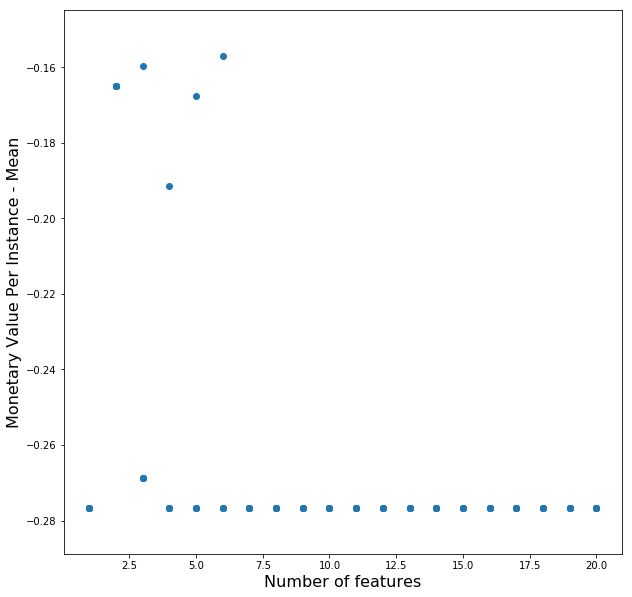

In [4]:
plot_number_features(result_table)

# Print performance of best 10 models

In [42]:
for rank in range(0,11):
    best = BestModel(rank)
    monetary_value = get_monetary_value(best)
    print()
    best.print_best_model()
    print("-----------------------------------------------------------------------------------------------")

True negative:  1775
False positive:  0
False negative:  0
True positive:  104
520 for  1879  instances in the test set
0.276742948377  per instance in the test set

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')
['trustLevel' 'lineItemVoidsPerPosition' 'scannedLineItems'
 'pricePerScannedLineItem' 'scansWithoutRegistrationPerScannedLineItem'
 'quantityModificationsPerScannedLineItem']
-----------------------------------------------------------------------------------------------
True negative:  1758
False positive:  17
False negative:  30
True positive:  74
-205 for  1879  instances in the test set
-0.109100585418  per instance in the test set

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=1,
           weights='uniform')
['trustLevel' 'scannedLineItems' 'pricePerScannedLineItem']
--

In [43]:
fraud = train[train['fraud'] == 1]
non_fraud = train[train['fraud'] == 0] 

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


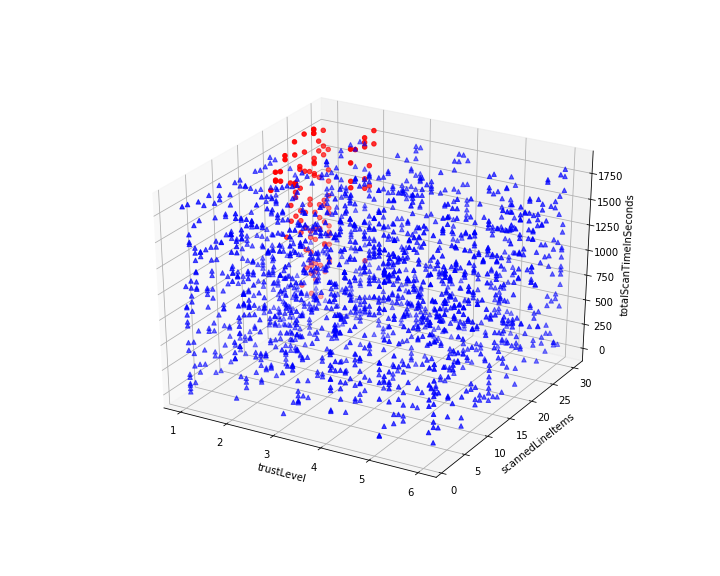

In [44]:
%matplotlib inline  
%matplotlib notebook
%pylab

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = fraud['trustLevel']
Y = fraud['scannedLineItems']
Z = fraud['totalScanTimeInSeconds']

Xs = non_fraud['trustLevel']
Ys = non_fraud['scannedLineItems']
Zs = non_fraud['totalScanTimeInSeconds']



ax.scatter(X,Y,Z, c='r', marker='o')
ax.scatter(Xs,Ys,Zs, c='b', marker='^')


ax.set_xlabel('trustLevel')
ax.set_ylabel('scannedLineItems')
ax.set_zlabel('totalScanTimeInSeconds')

plt.show()

# MinMax scalar

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


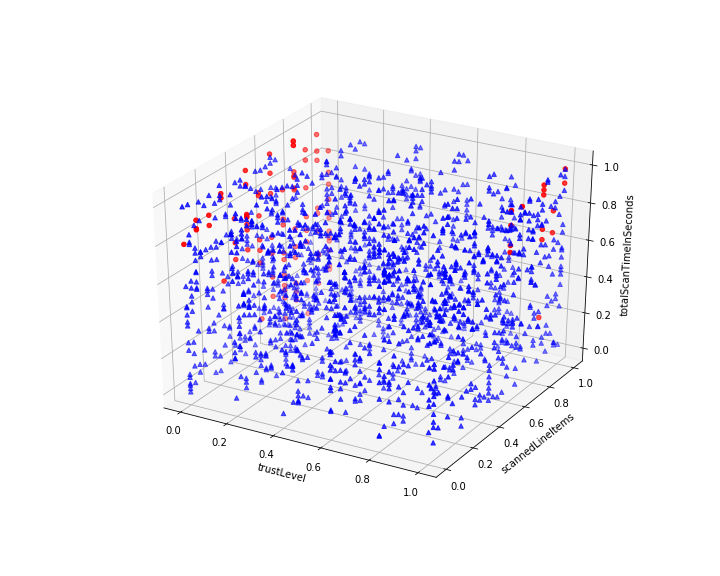

In [52]:
%matplotlib inline  
%matplotlib notebook
%pylab

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler 

fig = plt.figure(figsize(10,8))
ax = fig.add_subplot(111, projection='3d')

feature_scaler = MinMaxScaler()  
fraud_scaled = pd.DataFrame(feature_scaler.fit_transform(fraud.values), columns=fraud.columns, index=fraud.index)
non_fraud_scaled = pd.DataFrame(feature_scaler.fit_transform(non_fraud.values), columns=non_fraud.columns, index=non_fraud.index)


X = fraud_scaled['trustLevel']
Y = fraud_scaled['scannedLineItems']
Z = fraud_scaled['totalScanTimeInSeconds']

Xs = non_fraud_scaled['trustLevel']
Ys = non_fraud_scaled['scannedLineItems']
Zs = non_fraud_scaled['totalScanTimeInSeconds']

 

ax.scatter(X,Y,Z, c='r', marker='o')
ax.scatter(Xs,Ys,Zs, c='b', marker='^')


ax.set_xlabel('trustLevel')
ax.set_ylabel('scannedLineItems')
ax.set_zlabel('totalScanTimeInSeconds')

plt.show()

# Standard scaler

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


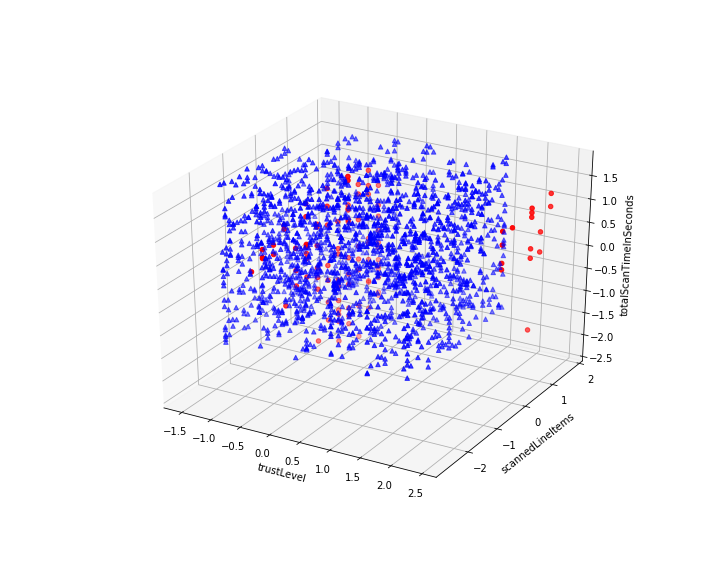

In [46]:
%matplotlib inline  
%matplotlib notebook
%pylab

fig = plt.figure(figsize(10,8))
ax = fig.add_subplot(111, projection='3d')

feature_scaler = StandardScaler()  
fraud_scaled = pd.DataFrame(feature_scaler.fit_transform(fraud.values), columns=fraud.columns, index=fraud.index)
non_fraud_scaled = pd.DataFrame(feature_scaler.fit_transform(non_fraud.values), columns=non_fraud.columns, index=non_fraud.index)


X = fraud_scaled['trustLevel']
Y = fraud_scaled['scannedLineItems']
Z = fraud_scaled['totalScanTimeInSeconds']

Xs = non_fraud_scaled['trustLevel']
Ys = non_fraud_scaled['scannedLineItems']
Zs = non_fraud_scaled['totalScanTimeInSeconds']

 

ax.scatter(X,Y,Z, c='r', marker='o')
ax.scatter(Xs,Ys,Zs, c='b', marker='^')


ax.set_xlabel('trustLevel')
ax.set_ylabel('scannedLineItems')
ax.set_zlabel('totalScanTimeInSeconds')

plt.show()

# Log scaler

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


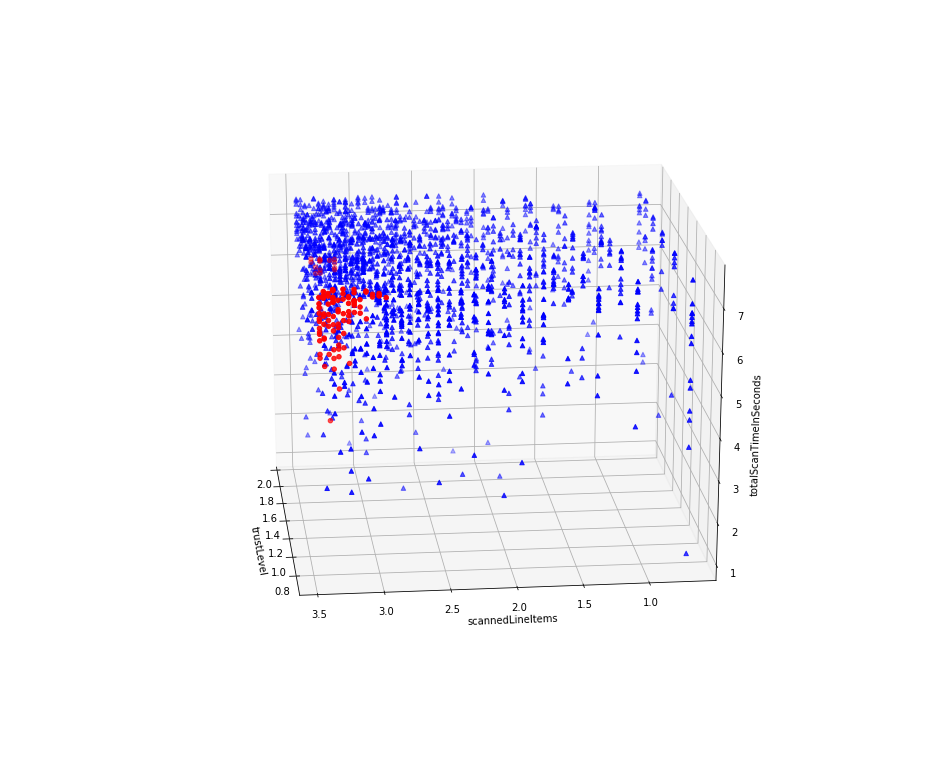

In [47]:
%matplotlib inline  
%matplotlib notebook
%pylab

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize(10,8))
ax = fig.add_subplot(111, projection='3d')

feature_scaler = FunctionTransformer(np.log1p, validate=True)   
fraud_scaled = pd.DataFrame(feature_scaler.fit_transform(fraud.values), columns=fraud.columns, index=fraud.index)
non_fraud_scaled = pd.DataFrame(feature_scaler.fit_transform(non_fraud.values), columns=non_fraud.columns, index=non_fraud.index)


X = fraud_scaled['trustLevel']
Y = fraud_scaled['scannedLineItems']
Z = fraud_scaled['totalScanTimeInSeconds']

Xs = non_fraud_scaled['trustLevel']
Ys = non_fraud_scaled['scannedLineItems']
Zs = non_fraud_scaled['totalScanTimeInSeconds']

 

ax.scatter(X,Y,Z, c='r', marker='o')
ax.scatter(Xs,Ys,Zs, c='b', marker='^')


ax.set_xlabel('trustLevel')
ax.set_ylabel('scannedLineItems')
ax.set_zlabel('totalScanTimeInSeconds')

plt.show()

In [48]:
fraud_scaled.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,scannedLineItems,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
5,0.693147,6.647688,2.492379,2.484907,1.791759,1.098612,0.033209,0.014300,0.352821,0.693147,3.295837,0.355251,0.175891,0.074108,0.014185,0.006473,0.002594,4.254647,0.689081,0.372154,0.165805
37,1.098612,7.242798,4.152456,2.079442,2.302585,1.609438,0.017737,0.043828,0.246860,0.693147,3.258097,1.253791,0.307485,0.148420,0.004998,0.006422,0.002859,3.149305,0.106015,0.134350,0.061949
53,0.693147,7.234177,3.574590,1.791759,2.197225,1.609438,0.019307,0.024731,0.169899,0.693147,3.332205,0.826123,0.259511,0.138150,0.003604,0.005760,0.002884,3.712024,0.134684,0.207567,0.109160
91,0.693147,6.904751,4.289637,2.079442,0.000000,0.693147,0.026748,0.069740,0.230524,0.693147,3.332205,1.298677,0.000000,0.036368,0.007004,0.000000,0.001004,2.697654,0.092856,0.000000,0.013805
97,1.098612,7.174724,4.484696,2.079442,2.197225,1.609438,0.021229,0.065005,0.223144,0.693147,3.367296,1.418364,0.251314,0.133531,0.005350,0.006112,0.003060,2.765612,0.076834,0.087344,0.044625


In [51]:
non_fraud_scaled.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,scannedLineItems,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
0,1.791759,6.961296,4.019980,2.079442,0.000000,1.386294,0.027143,0.050596,0.216223,0.0,3.401197,1.059943,0.000000,0.098440,0.006619,0.000000,0.002842,3.009080,0.120420,0.000000,0.053393
1,1.386294,4.691348,3.344980,1.791759,1.098612,1.609438,0.121890,0.225807,0.305382,0.0,2.708050,1.083257,0.133531,0.251314,0.045257,0.018349,0.036368,1.598856,0.167841,0.070551,0.136451
2,1.386294,7.324490,4.145671,1.386294,2.397895,1.791759,0.008539,0.040184,0.207639,0.0,2.639057,1.754670,0.570545,0.325422,0.001977,0.006575,0.003293,3.234303,0.047134,0.149174,0.077366
3,1.945910,7.491088,4.535927,2.197225,1.609438,1.609438,0.016062,0.050257,0.243622,0.0,3.401197,1.431053,0.129212,0.129212,0.004457,0.002231,0.002231,3.015634,0.083113,0.042420,0.042420
4,1.791759,6.066108,4.413162,1.386294,2.079442,1.098612,0.060898,0.173621,0.105361,0.0,3.332205,1.391190,0.230524,0.071459,0.006953,0.016148,0.004640,1.836435,0.036135,0.082370,0.024235


# Robust scaler

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


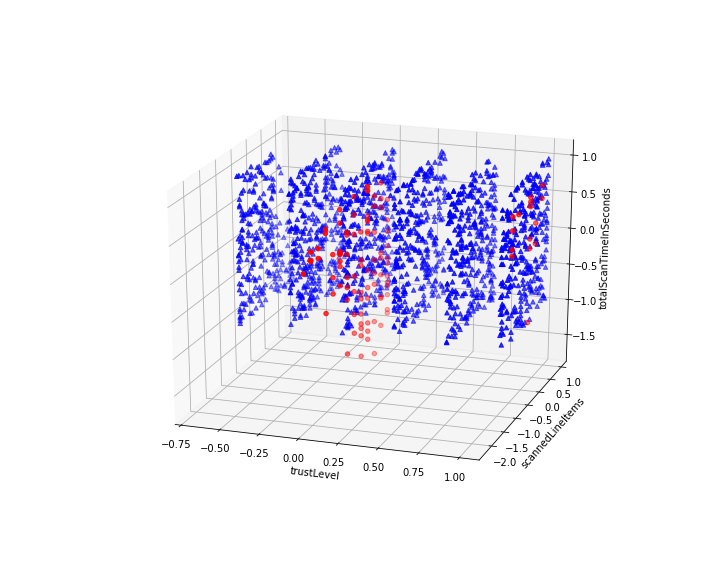

In [53]:
%matplotlib inline  
%matplotlib notebook
%pylab

fig = plt.figure(figsize(10,8))
ax = fig.add_subplot(111, projection='3d')

feature_scaler = RobustScaler()
fraud_scaled = pd.DataFrame(feature_scaler.fit_transform(fraud.values), columns=fraud.columns, index=fraud.index)
non_fraud_scaled = pd.DataFrame(feature_scaler.fit_transform(non_fraud.values), columns=non_fraud.columns, index=non_fraud.index)


X = fraud_scaled['trustLevel']
Y = fraud_scaled['scannedLineItems']
Z = fraud_scaled['totalScanTimeInSeconds']

Xs = non_fraud_scaled['trustLevel']
Ys = non_fraud_scaled['scannedLineItems']
Zs = non_fraud_scaled['totalScanTimeInSeconds']

 

ax.scatter(X,Y,Z, c='r', marker='o')
ax.scatter(Xs,Ys,Zs, c='b', marker='^')


ax.set_xlabel('trustLevel')
ax.set_ylabel('scannedLineItems')
ax.set_zlabel('totalScanTimeInSeconds')

plt.show()